**Question 8: Using the data from Question 5, write code to analyze the data and answer the following questions**

**Note:**
1. Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding.

**Insights to be drawn:**
* Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.
* Get all the episode names, whose average rating is more than 8 for every season.
* Get all the episode names that aired before May 2019.
* Get the episode name from each season with the highest and lowest rating.
* Get the summary for the most popular ( ratings ) episode in every season.

In [1]:
# Imports
import json
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen

In [2]:
# Getting the data
URL = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
response = urlopen(URL)
data_json = json.loads(response.read())
df = pd.DataFrame(data_json["_embedded"]["episodes"])
df.head(3)

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>A woman named Dolores is a free spirit in t...,{'self': {'href': 'https://api.tvmaze.com/epis...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,2016-10-10T01:00:00+00:00,60,{'average': 7.7},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard suspects that someone is sabotaging...,{'self': {'href': 'https://api.tvmaze.com/epis...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,2016-10-17T01:00:00+00:00,60,{'average': 7.6},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard continues to investigate Dolores' s...,{'self': {'href': 'https://api.tvmaze.com/epis...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        36 non-null     int64 
 1   url       36 non-null     object
 2   name      36 non-null     object
 3   season    36 non-null     int64 
 4   number    36 non-null     int64 
 5   type      36 non-null     object
 6   airdate   36 non-null     object
 7   airtime   36 non-null     object
 8   airstamp  36 non-null     object
 9   runtime   36 non-null     int64 
 10  rating    36 non-null     object
 11  image     36 non-null     object
 12  summary   36 non-null     object
 13  _links    36 non-null     object
dtypes: int64(4), object(10)
memory usage: 4.1+ KB


# 1. Getting the overall rating (median rating) per season:

In [4]:
df["rating"].value_counts()

{'average': 7.7}    7
{'average': 8}      6
{'average': 7.9}    4
{'average': 7.8}    4
{'average': 7.5}    4
{'average': 7.6}    3
{'average': 8.5}    2
{'average': 8.7}    2
{'average': 8.6}    1
{'average': 8.4}    1
{'average': 7.1}    1
{'average': 7.4}    1
Name: rating, dtype: int64

## Creating two new columns, `rating_value` and `rating_category` from the already existing `rating` column:

In [5]:
rating_values = []
for i in range(len(df)):
    for j in df["rating"][i].values():
        rating_values.append(j)

In [6]:
df["rating_value"] = rating_values
df.head(3)

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links,rating_value
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>A woman named Dolores is a free spirit in t...,{'self': {'href': 'https://api.tvmaze.com/epis...,8.0
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,2016-10-10T01:00:00+00:00,60,{'average': 7.7},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard suspects that someone is sabotaging...,{'self': {'href': 'https://api.tvmaze.com/epis...,7.7
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,2016-10-17T01:00:00+00:00,60,{'average': 7.6},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard continues to investigate Dolores' s...,{'self': {'href': 'https://api.tvmaze.com/epis...,7.6


In [7]:
rating_category = []
for i in range(len(df)):
    for j in df["rating"][i].keys():
        rating_category.append(j)

In [8]:
df["rating_category"] = rating_category
df.head(3)

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links,rating_value,rating_category
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>A woman named Dolores is a free spirit in t...,{'self': {'href': 'https://api.tvmaze.com/epis...,8.0,average
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,2016-10-10T01:00:00+00:00,60,{'average': 7.7},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard suspects that someone is sabotaging...,{'self': {'href': 'https://api.tvmaze.com/epis...,7.7,average
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,2016-10-17T01:00:00+00:00,60,{'average': 7.6},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard continues to investigate Dolores' s...,{'self': {'href': 'https://api.tvmaze.com/epis...,7.6,average


## Grouping by `season`:

In [9]:
season_group = df.groupby(["season"])
season_group

## Median rating per season:

In [10]:
season_group.agg("median")["rating_value"]

C:\Users\Sushrut\AppData\Local\Temp\ipykernel_1400\1951601093.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  season_group.agg("median")["rating_value"]


season
1    8.00
2    7.85
3    7.80
4    7.55
Name: rating_value, dtype: float64

C:\Users\Sushrut\AppData\Local\Temp\ipykernel_1400\4003256389.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  season_group.agg("median")["rating_value"].plot(kind="bar");


Text(0, 0.5, 'Median rating value')

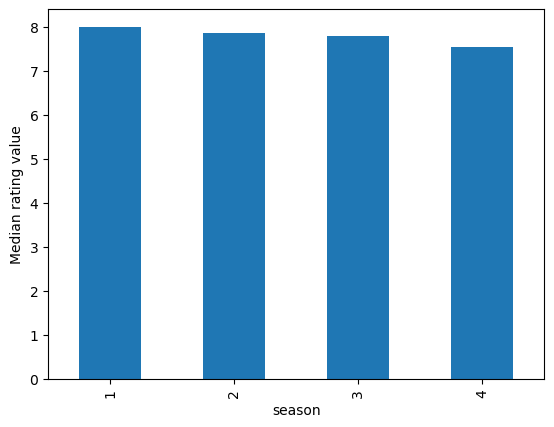

In [11]:
season_group.agg("median")["rating_value"].plot(kind="bar");
plt.ylabel("Median rating value")

In [12]:
season_group["rating_category"].value_counts()

season  rating_category
1       average            10
2       average            10
3       average             8
4       average             8
Name: rating_category, dtype: int64

# 2. Getting episode names whose average rating is more than 8 for every season:

## Filtering for `rating_value` to be greater than 8:

In [13]:
df[df["rating_value"] > 8]

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links,rating_value,rating_category
6,938404,https://www.tvmaze.com/episodes/938404/westwor...,Trompe L'Oeil,1,7,regular,2016-11-13,21:00,2016-11-14T02:00:00+00:00,60,{'average': 8.6},{'medium': 'https://static.tvmaze.com/uploads/...,<p>While William and Dolores travel to the unc...,{'self': {'href': 'https://api.tvmaze.com/epis...,8.6,average
8,943066,https://www.tvmaze.com/episodes/943066/westwor...,The Well-Tempered Clavier,1,9,regular,2016-11-27,21:00,2016-11-28T02:00:00+00:00,60,{'average': 8.5},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard forces Robert to take him back into...,{'self': {'href': 'https://api.tvmaze.com/epis...,8.5,average
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,21:00,2016-12-05T02:00:00+00:00,90,{'average': 8.7},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Delores finds out the truth about William's...,{'self': {'href': 'https://api.tvmaze.com/epis...,8.7,average
17,1459788,https://www.tvmaze.com/episodes/1459788/westwo...,Kiksuya,2,8,regular,2018-06-10,21:00,2018-06-11T01:00:00+00:00,60,{'average': 8.7},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Another of Westworld's Host revolutionaries...,{'self': {'href': 'https://api.tvmaze.com/epis...,8.7,average
18,1459789,https://www.tvmaze.com/episodes/1459789/westwo...,Vanishing Point,2,9,regular,2018-06-17,21:00,2018-06-18T01:00:00+00:00,60,{'average': 8.4},{'medium': 'https://static.tvmaze.com/uploads/...,<p>The Man learns that his grip on reality isn...,{'self': {'href': 'https://api.tvmaze.com/epis...,8.4,average
19,1459790,https://www.tvmaze.com/episodes/1459790/westwo...,The Passenger,2,10,regular,2018-06-24,21:00,2018-06-25T01:00:00+00:00,90,{'average': 8.5},{'medium': 'https://static.tvmaze.com/uploads/...,"<p>The Man faces a personal reckoning, while A...",{'self': {'href': 'https://api.tvmaze.com/epis...,8.5,average


## Names for these episodes:

In [14]:
df[df["rating_value"] > 8]["name"].unique()

array(["Trompe L'Oeil", 'The Well-Tempered Clavier', 'The Bicameral Mind',
       'Kiksuya', 'Vanishing Point', 'The Passenger'], dtype=object)

# 3. Getting episode names that aired before May 2019:

In [15]:
df["airdate"] = pd.to_datetime(df["airdate"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               36 non-null     int64         
 1   url              36 non-null     object        
 2   name             36 non-null     object        
 3   season           36 non-null     int64         
 4   number           36 non-null     int64         
 5   type             36 non-null     object        
 6   airdate          36 non-null     datetime64[ns]
 7   airtime          36 non-null     object        
 8   airstamp         36 non-null     object        
 9   runtime          36 non-null     int64         
 10  rating           36 non-null     object        
 11  image            36 non-null     object        
 12  summary          36 non-null     object        
 13  _links           36 non-null     object        
 14  rating_value     36 non-null     float64    

## Filtering for `air_date` before May 2019:

In [16]:
df[(df["airdate"] < "2019-05-01")]

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links,rating_value,rating_category
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>A woman named Dolores is a free spirit in t...,{'self': {'href': 'https://api.tvmaze.com/epis...,8.0,average
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,2016-10-10T01:00:00+00:00,60,{'average': 7.7},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard suspects that someone is sabotaging...,{'self': {'href': 'https://api.tvmaze.com/epis...,7.7,average
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,2016-10-17T01:00:00+00:00,60,{'average': 7.6},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard continues to investigate Dolores' s...,{'self': {'href': 'https://api.tvmaze.com/epis...,7.6,average
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,2016-10-24T01:00:00+00:00,60,{'average': 7.9},{'medium': 'https://static.tvmaze.com/uploads/...,<p>While Dolores joins William and Logan on th...,{'self': {'href': 'https://api.tvmaze.com/epis...,7.9,average
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,2016-10-31T01:00:00+00:00,60,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Dolores takes the first step on her path of...,{'self': {'href': 'https://api.tvmaze.com/epis...,8.0,average
5,932057,https://www.tvmaze.com/episodes/932057/westwor...,The Adversary,1,6,regular,2016-11-06,21:00,2016-11-07T02:00:00+00:00,60,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,"<p>While Maeve convinces Felix to show her ""up...",{'self': {'href': 'https://api.tvmaze.com/epis...,8.0,average
6,938404,https://www.tvmaze.com/episodes/938404/westwor...,Trompe L'Oeil,1,7,regular,2016-11-13,21:00,2016-11-14T02:00:00+00:00,60,{'average': 8.6},{'medium': 'https://static.tvmaze.com/uploads/...,<p>While William and Dolores travel to the unc...,{'self': {'href': 'https://api.tvmaze.com/epis...,8.6,average
7,943065,https://www.tvmaze.com/episodes/943065/westwor...,Trace Decay,1,8,regular,2016-11-20,21:00,2016-11-21T02:00:00+00:00,60,{'average': 7.9},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard tries to cope with what he did unde...,{'self': {'href': 'https://api.tvmaze.com/epis...,7.9,average
8,943066,https://www.tvmaze.com/episodes/943066/westwor...,The Well-Tempered Clavier,1,9,regular,2016-11-27,21:00,2016-11-28T02:00:00+00:00,60,{'average': 8.5},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard forces Robert to take him back into...,{'self': {'href': 'https://api.tvmaze.com/epis...,8.5,average
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,21:00,2016-12-05T02:00:00+00:00,90,{'average': 8.7},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Delores finds out the truth about William's...,{'self': {'href': 'https://api.tvmaze.com/epis...,8.7,average


## Getting the episode names:

In [17]:
df[(df["airdate"] < "2019-05-01")]["name"].unique()

array(['The Original', 'Chestnut', 'The Stray', 'Dissonance Theory',
       'Contrapasso', 'The Adversary', "Trompe L'Oeil", 'Trace Decay',
       'The Well-Tempered Clavier', 'The Bicameral Mind',
       'Journey Into Night', 'Reunion', 'Virtù e Fortuna',
       'The Riddle of the Sphinx', 'Akane No Mai', 'Phase Space',
       'Les Écorchés', 'Kiksuya', 'Vanishing Point', 'The Passenger'],
      dtype=object)

# 4. Episode names from each season with the highest and lowest rating:

In [18]:
least_rating_season_1 = min(list(season_group.get_group(1)["rating_value"]))
highest_rating_season_1 = max(list(season_group.get_group(1)["rating_value"]))
least_rating_season_2 = min(list(season_group.get_group(2)["rating_value"]))
highest_rating_season_2 = max(list(season_group.get_group(2)["rating_value"]))
least_rating_season_3 = min(list(season_group.get_group(3)["rating_value"]))
highest_rating_season_3 = max(list(season_group.get_group(3)["rating_value"]))
least_rating_season_4 = min(list(season_group.get_group(4)["rating_value"]))
highest_rating_season_4 = max(list(season_group.get_group(4)["rating_value"]))

In [19]:
# Name of the episode with lowest rating in season 1
season_group.get_group(1).loc[(season_group.get_group(1).rating_value == least_rating_season_1)]["name"]

2    The Stray
Name: name, dtype: object

In [20]:
# Name of the episode with highest rating in season 1
season_group.get_group(1).loc[(season_group.get_group(1).rating_value == highest_rating_season_1)]["name"]

9    The Bicameral Mind
Name: name, dtype: object

In [21]:
# Name of the episode with lowest rating in season 2
season_group.get_group(2).loc[(season_group.get_group(2).rating_value == least_rating_season_2)]["name"]

14    Akane No Mai
Name: name, dtype: object

In [22]:
# Name of the episode with highest rating in season 2
season_group.get_group(2).loc[(season_group.get_group(2).rating_value == highest_rating_season_2)]["name"]

17    Kiksuya
Name: name, dtype: object

In [23]:
# Name of the episode with lowest rating in season 3
season_group.get_group(3).loc[(season_group.get_group(3).rating_value == least_rating_season_3)]["name"]

25    Decoherence
26    Passed Pawn
Name: name, dtype: object

In [24]:
# Name of the episode with highest rating in season 3
season_group.get_group(3).loc[(season_group.get_group(3).rating_value == highest_rating_season_3)]["name"]

20            Parce Domine
23    The Mother of Exiles
Name: name, dtype: object

In [25]:
# Name of the episode with lowest rating in season 4
season_group.get_group(4).loc[(season_group.get_group(4).rating_value == least_rating_season_4)]["name"]

28    The Auguries
Name: name, dtype: object

In [26]:
# Name of the episode with highest rating in season 4
season_group.get_group(4).loc[(season_group.get_group(4).rating_value == highest_rating_season_4)]["name"]

32    Zhuangzi
Name: name, dtype: object

# 5. Getting `summary` for the most popular (ratings) episode in every season:

In [27]:
# `summary` of the episode with highest rating in season 1
season_group.get_group(1).loc[(season_group.get_group(1).rating_value == highest_rating_season_1)]["summary"].values[0]

"<p>Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.</p>"

In [28]:
# `summary` of the episode with highest rating in season 2
season_group.get_group(2).loc[(season_group.get_group(2).rating_value == highest_rating_season_2)]["summary"].values[0]

"<p>Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.</p>"

In [29]:
# `summary` of the episode with highest rating in season 3
season_group.get_group(3).loc[(season_group.get_group(3).rating_value == highest_rating_season_3)]["summary"].values#[0]

array(["<p>If you're stuck in a loop, try walking in a straight line.</p>",
       "<p>The truth doesn't always set you free.</p>"], dtype=object)

In [30]:
# `summary` of the episode with highest rating in season 4
season_group.get_group(4).loc[(season_group.get_group(4).rating_value == highest_rating_season_4)]["summary"].values[0]

'<p>God is bored.</p>'